## Applying Markov Chains to Drug Discovery!

Now we will look at applying Markov chains to find a drug to cure a disease. 

### Background

A protein can exist in 3 states as shown below - 

1. A "good" state - in which it performs all of its functions (^_^)
2. A "neutral" state - the protein does no harm in this state but does not perform its known functions (-_-)
3. A "diseased" state - the protein in this state causes a disease (⌣̩̩́_⌣̩̩̀)

<img src="protein_mc.png" style="width:275px; height:225px"> 

The protein can jump from any one state to another, just like Ana from our previous example! However, there are some twists and turns this time....

### Task

We wish to study the behaviour of the protein with various drugs administered to the patient

What you will do is the following - 

1. "_Administer_" a drug to the protein
2. Study how the protein behaves when the drug is administered
3. Find out which drug is the best!

In [1]:
import pandas as pd
from markov_chain import MarkovChain, ProteinMarkovChain
import matplotlib.pyplot as plt

##### Step 1: Administer drug and measure probability of going from one state to another

1. We have 3 drug candidates - "Drug 1", "Drug 2", and "Drug 3" (they can not be named by their chemical names since they are still under FDA approval :))
2. Change the drug name below to one of the drugs and run the simulation
3. The simulation runs using a hidden Markov "_model_", that is, we only get access to "number of jumps" and not the real probabilities!

In [2]:
drug_name = 'Drug 2'

starting_state = 'Neutral'
time = 1000
protein_mc = ProteinMarkovChain(drug_name)

# Run a simulation with the protein
protein_mc.run_model( starting_state, time=time)

print('\nThe number of jumps from the model simulation are given in the table below (rows are from state, columns are to state)')

protein_mc.dataframe

Simulation has been completed! Ana has traveled to 1000 cities, starting from Neutral

The number of jumps from the model simulation are given in the table below (rows are from state, columns are to state)


,Good,Neutral,Diseased
Good,0,4,1
Neutral,5,0,0
Diseased,0,0,990


##### Step 2: Input the probabilities and find time spent in each state for the given drug

1. Input the probabilities calculated from above and fill in the Excel sheet titled _"drug_probabilities.xlsx"_
2. Note down the time spent in each state after administering each drug

You can still change the starting state and number of time steps you wish to _simulate_ the protein for

**Important**: Do you notice anything weird about Drug 2?! Is it a good drug? _Hint_: Does the model get **stuck**?

Protein simulation has been completed


<IPython.core.display.Javascript object>


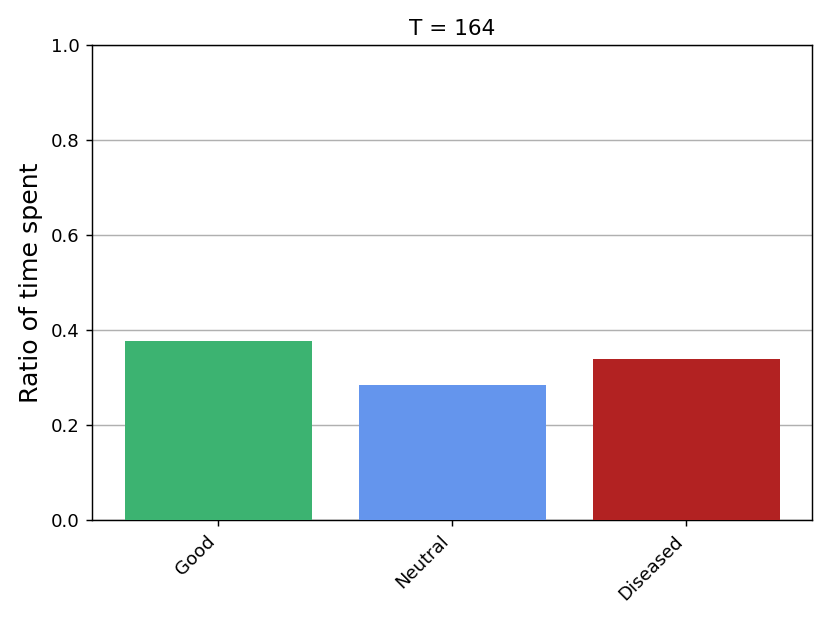

In [3]:
df = pd.read_excel('drug_probabilities.xlsx', header=0, index_col=0)
probs = df.to_numpy()

states = ['Good', 'Neutral', 'Diseased']

######################################################
## This section is for you to change :) ##

starting_state = 'Good'
time = 200

######################################################


# Initialize a simulation
drug_mc = MarkovChain( states, probs, drug_sim=True )

# Run simulation
drug_mc.run_simulation( starting_state, time )

# Analyze results
%matplotlib nbagg

drug_mc.plot_simulation()
plt.show()